# -Context
Fake news has become one of the biggest problems of our age. It has serious impact on our online as well as offline discourse. One can even go as far as saying that, to date, fake news poses a clear and present danger to western democracy and stability of the society.

-Content
What's inside is more than just rows and columns. Make it easy for others to get started by describing how you acquired the data and what time period it represents, too.
What is a Fake News?
Fake news's simple meaning is to incorporate information that leads people to the wrong path. Nowadays fake news spreading like water and people share this information without verifying it. This is often done to further or impose certain ideas and is often achieved with political agendas.
For media outlets, the ability to attract viewers to their websites is necessary to generate online advertising revenue. So it is necessary to detect fake news.


-Workflow

In this project, we are using some machine learning and Natural language processing libraries like NLTK, re (Regular Expression), Scikit Learn.

-Natural Language Processing
Machine learning data only works with numerical features so we have to convert text data into numerical columns. So we have to preprocess the text and that is called natural language processing.
In-text preprocess we are cleaning our text by steaming, lemmatization, remove stopwords, remove special symbols and numbers, etc. After cleaning the data we have to feed this text data into a vectorizer which will convert this text data into numerical features.

-Dataset
You can find many datasets for fake news detection on Kaggle or many other sites. I download these datasets from Kaggle. There are two datasets one for fake news and one for true news. In true news, there is 21417 news, and in fake news, there is 23481 news. You have to insert one label column zero for fake news and one for true news. We are combined both datasets using pandas built-in function.

Some Useful Links-
1-https://www.javatpoint.com/nlp
2-https://www.educative.io/answers/preprocessing-steps-in-natural-language-processing-nlp
3-https://www.youtube.com/watch?v=5ctbvkAMQO4
4-https://www.youtube.com/watch?v=X2vAabgKiuM


Let’s get started!






In [164]:
# Import libraries need for Modelling
# Let's Import all the required libraries

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns



import nltk, re
import string
from nltk.corpus import stopwords
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve,roc_auc_score,auc
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
warnings.warn("deprecated", DeprecationWarning)

In [165]:

dt1=pd.read_csv(r"C:\Users\sanka\Downloads\Compressed\Fake-News-Project\Fake News Project\Fake.csv")

In [166]:
dt2=pd.read_csv(r"C:\Users\sanka\Downloads\Compressed\Fake-News-Project\Fake News Project\Fake.csv")

In [167]:
dt1

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [168]:
dt2

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [169]:
#To display data details 
print(dt1)
print ('*'*100)

print(dt1.head(10))
print ('*'*100)
print(dt1.tail(10))
print ('*'*100)

print('The shape of the train dataset',dt1.shape)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [170]:
#To display data details 
print(dt2)
print ('*'*100)

print(dt2.head(10))
print ('*'*100)
print(dt2.tail(10))
print ('*'*100)

print('The shape of the train dataset',dt2.shape)

                                                   title  \
0       Donald Trump Sends Out Embarrassing New Year’...   
1       Drunk Bragging Trump Staffer Started Russian ...   
2       Sheriff David Clarke Becomes An Internet Joke...   
3       Trump Is So Obsessed He Even Has Obama’s Name...   
4       Pope Francis Just Called Out Donald Trump Dur...   
...                                                  ...   
23476  McPain: John McCain Furious That Iran Treated ...   
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...   
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...   
23479  How to Blow $700 Million: Al Jazeera America F...   
23480  10 U.S. Navy Sailors Held by Iranian Military ...   

                                                    text      subject  \
0      Donald Trump just couldn t wish all Americans ...         News   
1      House Intelligence Committee Chairman Devin Nu...         News   
2      On Friday, it was revealed that former Milwauk...    

In [171]:
#Analyzing dataset
print(dt1.isna().sum())
print ('*'*100)
print(dt2.isna().sum())


title      0
text       0
subject    0
date       0
dtype: int64
****************************************************************************************************
title      0
text       0
subject    0
date       0
dtype: int64


In [172]:

#Analyzing dataset
print(dt1.shape)
print ('*'*100)
print(dt2.shape)


(23481, 4)
****************************************************************************************************
(23481, 4)


<AxesSubplot:>

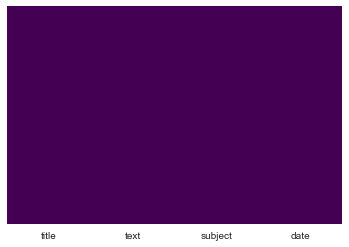

In [173]:

sns.heatmap(dt1.isnull(), yticklabels = False, cbar = False, cmap ='viridis')

<AxesSubplot:>

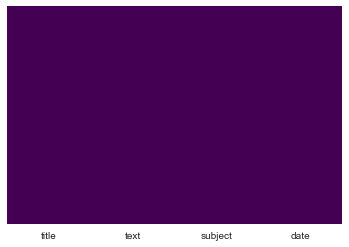

In [174]:

sns.heatmap(dt2.isnull(), yticklabels = False, cbar = False, cmap ='viridis')


In [175]:

# Getting information on the dataset
dt1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [176]:
# Getting information on the dataset
dt2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [177]:

# To find the data type of the dataset
for col in dt1:
    print ('This column', col ,'has', dt1[col].nunique(),'unique elements')
    print ('*'*100)


This column title has 17903 unique elements
****************************************************************************************************
This column text has 17455 unique elements
****************************************************************************************************
This column subject has 6 unique elements
****************************************************************************************************
This column date has 1681 unique elements
****************************************************************************************************


In [178]:
# To find the data type of the dataset
for col in dt2:
    print ('This column', col ,'has', dt2[col].nunique(),'unique elements')
    print ('*'*100)


This column title has 17903 unique elements
****************************************************************************************************
This column text has 17455 unique elements
****************************************************************************************************
This column subject has 6 unique elements
****************************************************************************************************
This column date has 1681 unique elements
****************************************************************************************************


In [179]:
dt1.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [180]:

dt2.describe(include='all')

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [181]:
dt1.drop(columns=['subject','date'], inplace=True)

In [182]:
dt2.drop(columns=['subject','date'], inplace=True)

In [183]:

dt1['Output']=1


In [184]:

dt2['Output']=0


In [185]:

dt1


,title,text,Output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1


In [186]:

dt2


,title,text,Output
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0
...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


1 is true news and 0 is false or fake news so a new column has been created

In [187]:

dt1['Input']=dt1['title']+dt1['text']

In [188]:

dt1

,title,text,Output,Input
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,1,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,1,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",1,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",1,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,1,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,1,How to Blow $700 Million: Al Jazeera America F...


In [189]:

dt2['Input']=dt2['title']+dt2['text']

In [190]:
dt2

,title,text,Output,Input
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,0,Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,0,Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",0,Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",0,Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0,McPain: John McCain Furious That Iran Treated ...
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0,How to Blow $700 Million: Al Jazeera America F...


In [191]:

dt1.drop(columns=['title','text'], inplace=True)

In [192]:

dt1

,Output,Input
0,1,Donald Trump Sends Out Embarrassing New Year’...
1,1,Drunk Bragging Trump Staffer Started Russian ...
2,1,Sheriff David Clarke Becomes An Internet Joke...
3,1,Trump Is So Obsessed He Even Has Obama’s Name...
4,1,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
23476,1,McPain: John McCain Furious That Iran Treated ...
23477,1,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,1,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,1,How to Blow $700 Million: Al Jazeera America F...


In [193]:

dt2.drop(columns=['title','text'], inplace=True)

In [194]:

dt2


,Output,Input
0,0,Donald Trump Sends Out Embarrassing New Year’...
1,0,Drunk Bragging Trump Staffer Started Russian ...
2,0,Sheriff David Clarke Becomes An Internet Joke...
3,0,Trump Is So Obsessed He Even Has Obama’s Name...
4,0,Pope Francis Just Called Out Donald Trump Dur...
...,...,...
23476,0,McPain: John McCain Furious That Iran Treated ...
23477,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479,0,How to Blow $700 Million: Al Jazeera America F...


In [195]:


dt=pd.concat([dt1, dt2], axis=0)

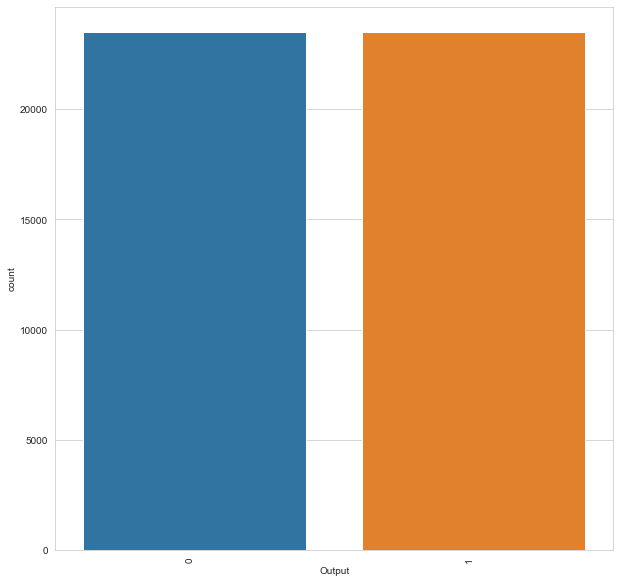

In [196]:

plt.subplots(figsize=(10,10))
chart =sns.countplot(dt['Output'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.show()


In [197]:

(dt['Output'].value_counts()/dt.shape[0])*100

1    50.0
0    50.0
Name: Output, dtype: float64

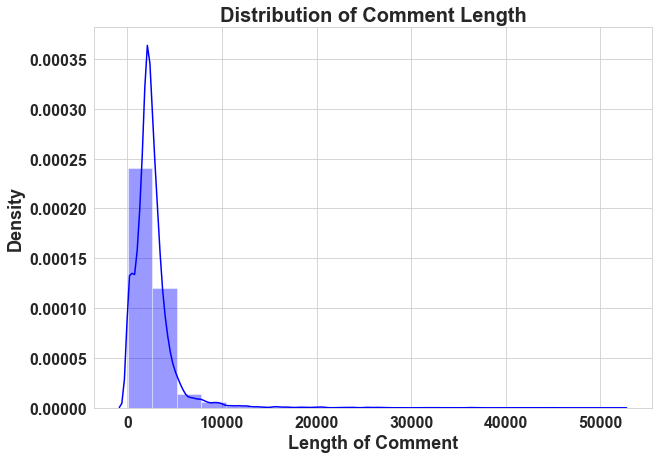

In [198]:

#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = dt.Input.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


In [199]:


ham_desc=dt[dt["Output"]==1]["Input"].describe()
spam_desc=dt[dt["Output"]==0]["Input"].describe()

print("Ham Messege Length Description:\n",ham_desc)
print("************************************")
print("Spam Message Length Description:\n",spam_desc)



Ham Messege Length Description:
 count                                                 23481
unique                                                17908
top       ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...
freq                                                      4
Name: Input, dtype: object
************************************
Spam Message Length Description:
 count                                                 23481
unique                                                17908
top       ELEMENTARY SCHOOL PLANS ‘BLACKS ONLY’ FIELD TR...
freq                                                      4
Name: Input, dtype: object


In [200]:

#Importing Required libraries
import nltk
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [201]:

#Defining the stop words
stop_words = stopwords.words('english')

#Defining the lemmatizer
lemmatizer = WordNetLemmatizer()


In [202]:
#Replacing '\n' in comment_text
dt['Input'] = dt['Input'].replace('\n',' ')

In [203]:
#Function Definition for using regex operations and other text preprocessing for getting cleaned texts
def clean_comments(text):
    
    #convert to lower case
    lowered_text = text.lower()
    
    #Replacing email addresses with 'emailaddress'
    text = re.sub(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress', lowered_text)
    
    #Replace URLs with 'webaddress'
    text = re.sub(r'http\S+', 'webaddress', text)
    
    #Removing numbers
    text = re.sub(r'[0-9]', " ", text)
    
    #Removing the HTML tags
    text = re.sub(r"<.*?>", " ", text)
    
    #Removing Punctuations
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'\_',' ',text)
    
    #Removing all the non-ascii characters 
    clean_words = re.sub(r'[^\x00-\x7f]',r'', text)
    
    #Removing the unwanted white spaces
    text = " ".join(text.split()) 
    
    #Splitting data into words
    tokenized_text = word_tokenize(text)
    
    #Removing remaining tokens that are not alphabetic, Removing stop words and Lemmatizing the text
    removed_stop_text = [lemmatizer.lemmatize(word) for word in tokenized_text if word not in stop_words if word.isalpha()]
   
    return " ".join(removed_stop_text)

In [204]:
import nltk
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sanka\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [205]:

# Calling the above function for the column comment_text in training dataset to replace original with cleaned text
dt['Input'] = dt['Input'].apply(clean_comments)
dt['Input'].head()


0    donald trump sends embarrassing new year eve m...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama name coded website i...
4    pope francis called donald trump christmas spe...
Name: Input, dtype: object

In [206]:

# Creating a column 'length_before_cleaning' in training dataset
# It represents the length of the each comment respectively in a column 'comment_text' 
dt['length_after_cleaning'] = dt['Input'].map(lambda comment_text: len(comment_text))
dt



,Output,Input,length_after_cleaning
0,1,donald trump sends embarrassing new year eve m...,1855
1,1,drunk bragging trump staffer started russian c...,1427
2,1,sheriff david clarke becomes internet joke thr...,2431
3,1,trump obsessed even obama name coded website i...,1882
4,1,pope francis called donald trump christmas spe...,1472
...,...,...,...
23476,0,mcpain john mccain furious iran treated u sail...,2341
23477,0,justice yahoo settle e mail privacy class acti...,1154
23478,0,sunnistan u allied safe zone plan take territo...,16838
23479,0,blow million al jazeera america finally call q...,1836


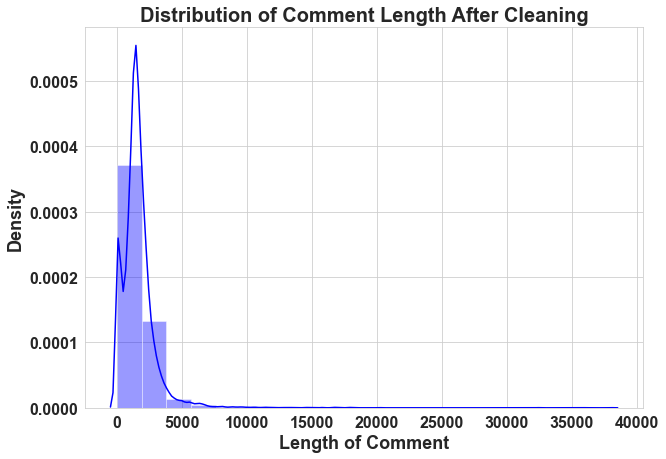

In [207]:

#Distribution of comments length
sns.set_style('whitegrid')
plt.figure(figsize=(10,7))
comment_len = dt.Input.str.len()
sns.distplot(comment_len, bins=20, color = 'blue')

plt.title("Distribution of Comment Length After Cleaning", fontsize=20, fontweight='bold')
plt.ylabel('Density', fontsize=18,fontweight='bold')
plt.xlabel('Length of Comment', fontsize=18,fontweight='bold')
plt.xticks(fontsize=16,fontweight ='bold')
plt.yticks(fontsize=16,fontweight ='bold')
plt.show()


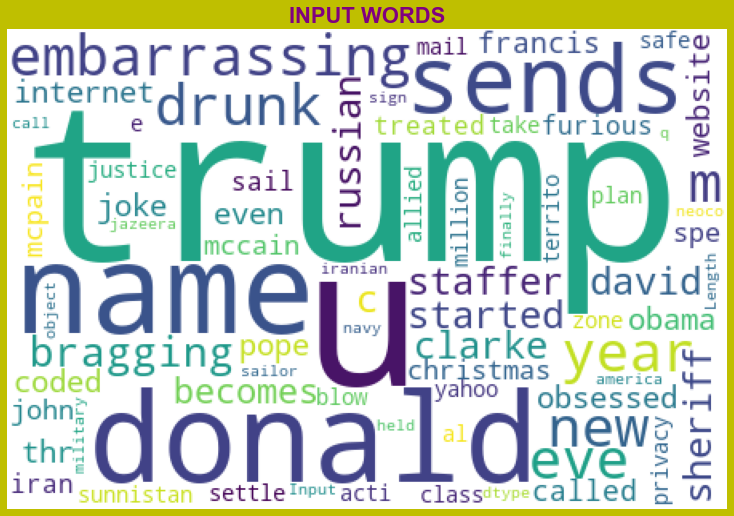

In [208]:

wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(dt['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='INPUT WORDS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()


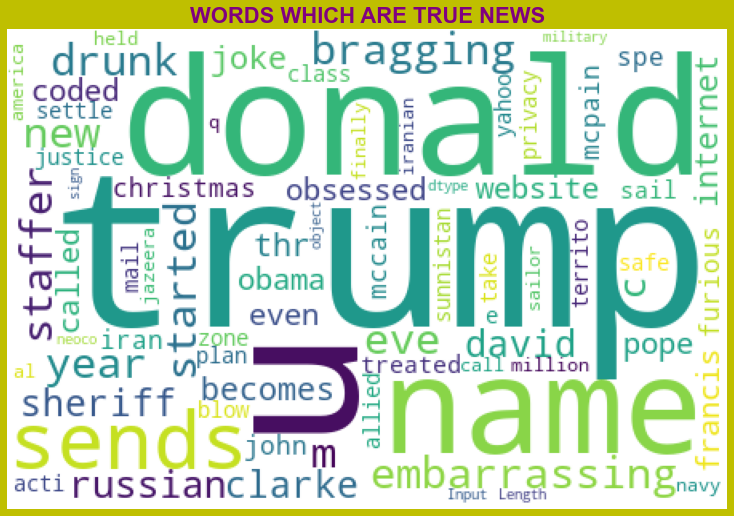

In [209]:

# Plotting for malignant
df_true=dt[(dt['Output']==1)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_true['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE TRUE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()


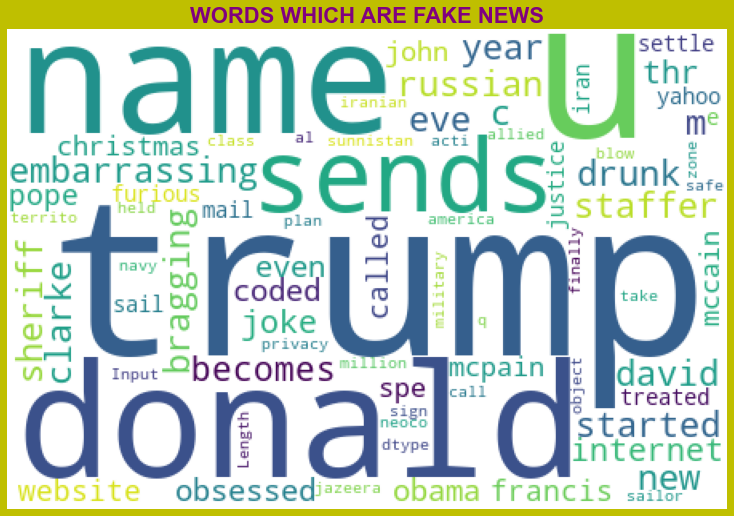

In [210]:
# Plotting for malignant
df_true=dt[(dt['Output']==0)]
wordcloud=WordCloud(height=300,width=450,max_words=300,background_color="white").generate(str(df_true['Input']))
plt.figure(figsize=(10,10),facecolor='y')
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title(label='WORDS WHICH ARE FAKE NEWS',fontdict={'fontsize':22, 'fontweight':'bold', 'color':'purple'})
plt.show()


In [211]:
# Converting the features into number vectors
tf_vec = TfidfVectorizer(max_features = 2000, stop_words='english')


In [212]:
# Let's Separate the input and output variables represented by X and y respectively in train data and convert them
X = tf_vec.fit_transform(dt['Input']).toarray()


In [213]:

y=dt['Output']


In [214]:

from sklearn.naive_bayes import BernoulliNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.metrics import hamming_loss, log_loss

In [215]:

import timeit, sys
import tqdm.notebook as tqdm


In [216]:
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=.20, random_state=42)
re=BernoulliNB()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")



	Hamming Loss  : 0.5915043117214948
	Accuracy Score: 0.40849568827850524
              precision    recall  f1-score   support

           0       0.39      0.34      0.37      4696
           1       0.42      0.48      0.45      4697

    accuracy                           0.41      9393
   macro avg       0.41      0.41      0.41      9393
weighted avg       0.41      0.41      0.41      9393


327

In [217]:
 from sklearn.neural_network import MLPClassifier

In [218]:
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=.20, random_state=42)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")



	Hamming Loss  : 0.8579793463217289
	Accuracy Score: 0.14202065367827105
              precision    recall  f1-score   support

           0       0.12      0.12      0.12      4696
           1       0.16      0.17      0.16      4697

    accuracy                           0.14      9393
   macro avg       0.14      0.14      0.14      9393
weighted avg       0.14      0.14      0.14      9393


327

In [219]:
x_train,x_test,y_train, y_test=train_test_split(X,y,test_size=.20, random_state=50)
re=MLPClassifier()
re.fit(x_train, y_train)
predtrain=re.predict(x_train)
predtest=re.predict(x_test)

re.fit(x_train,y_train)
        

predict_y = re.predict(x_test)
        
ham_loss = hamming_loss(y_test,predict_y)
sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
ac_score = accuracy_score(y_test,predict_y)
sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
cl_report = classification_report(y_test,predict_y)
sys.stdout.write(f"\n{cl_report}")


	Hamming Loss  : 0.8553177898435005
	Accuracy Score: 0.1446822101564995
              precision    recall  f1-score   support

           0       0.14      0.14      0.14      4752
           1       0.15      0.15      0.15      4641

    accuracy                           0.14      9393
   macro avg       0.14      0.14      0.14      9393
weighted avg       0.14      0.14      0.14      9393


327

In [ ]:
mlp_gs = MLPClassifier(max_iter=20)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
clf.fit(X, y) 

In [ ]:
print('Best parameters found:\n', clf.best_params_)

In [ ]:
#pickling
import pickle
filename = 'wqe'
outfile = open(filename,'wqe')
pickle.dump(wqe_dict,outfile)
outfile.close()
